In [3]:
# pip install matplotlib

  Using cached matplotlib-3.5.1-cp39-cp39-macosx_10_9_x86_64.whl (7.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 KB 343.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.5/899.5 KB 417.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 426.3 kB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Plot losses

In [114]:
def format_df(df, n_epochs, validation_set=True):
    """
    Format/summarize original batch_result.csv into performance per epoch.
    """
    if validation_set:
        df = df[["training_loss", "validation_loss"]]
    else:
        df = df[["training_loss"]]
    step = round((len(df)-1) / n_epochs) # if step = 50, 1 epoch will be completed every 50 steps.
    plot_df = df.iloc[::step]
    plot_df = plot_df.reset_index(drop=True)
    plot_df = plot_df.rename_axis('epoch').reset_index()

    return plot_df


def plot_losses(formatted_df, validation_set=True):
    plt.plot(formatted_df["training_loss"], label="train_loss")
    if validation_set:
        plt.plot(formatted_df["validation_loss"], label="val_loss")
    plt.legend()
    plt.title("Losses")
    plt.show()

### Batch 1

- corpus: Hamlet
- model='ada'
- n_training pairs=1000
- n_epochs=4
- batch_size=2
- learning_rate=unknown (0.5, 0.1 or 0.2)

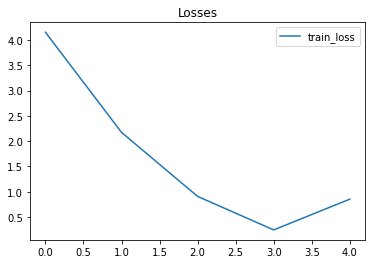

In [131]:
batch1_results = pd.read_csv('../data/results/batch1_results.csv', skiprows=[0])

batch1 = format_df(batch1_results, n_epochs=4, validation_set=False)
batch1_plot = plot_losses(batch1, validation_set=False)

### Batch 2

- corpus: MacBeth + Hamlet
- model='ada'
- n_training pairs=4000
- n_validation pairs=1000
- n_epochs=10
- batch_size=80
- learning_rate=0.1

50 batches (80 * 50 = 4000)

10 epochs

every 50 step is 1 epoch. 10 epochs = 500 steps

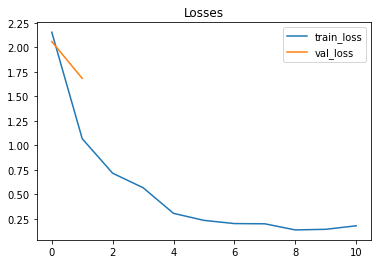

In [132]:
batch2_results = pd.read_csv('../data/results/batch2_results.csv', skiprows=[0])

batch2 = format_df(batch2_results, n_epochs=10)
batch2_plot = plot_losses(batch2)

In [128]:
batch2.describe()

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy
count,502.000000,5.020000e+02,502.000000,502.000000,502.000000,502.000000,92.000000,92.000000,92.000000
mean,251.500000,5.412967e+05,20120.000000,0.546532,0.063048,0.737877,2.165060,0.000543,0.299798
std,145.059183,3.115901e+05,11604.734666,0.517106,0.058050,0.213263,0.426488,0.002563,0.019776
min,1.000000,2.000000e+03,80.000000,0.125599,0.000000,0.226177,1.340744,0.000000,0.238397
25%,126.250000,2.729800e+05,10100.000000,0.188337,0.000000,0.582826,1.846040,0.000000,0.288171
50%,251.500000,5.414000e+05,20120.000000,0.249660,0.050000,0.871069,2.131758,0.000000,0.298945
75%,376.750000,8.104600e+05,30140.000000,0.845238,0.112500,0.891351,2.516437,0.000000,0.312994
max,502.000000,1.080160e+06,40160.000000,2.154347,0.237500,0.919126,3.009240,0.012500,0.340934
